<a href="https://colab.research.google.com/github/hjornskar-ctrl/dim-clem/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limiting yourself to a coincident (not coherent) analysis:

    Compute the SNR time series for the CBC signal model
    Compute the SNR time series for the Burst signal model
    Discuss the differences, if any.
    Estimate a bound on the False Alarm Rate of the detection.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import get_window

In [3]:


! pip install -q gwpy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 44.0.2 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 44.0.2 which is incompatible.


In [4]:
! pip install -q lalsuite pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 17.3 MB/s eta 0:00:00


In [5]:
from gwpy.timeseries import TimeSeries

/usr/local/lib/python3.11/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [6]:
time_centre = 1264316116.4

In [7]:
# This might be the slowest cell execution, as it downloads the data. Run itonly once !
strain_H1 = TimeSeries.fetch_open_data('H1', time_centre - 16, time_centre +16)

In [8]:
Pxx_H1=strain_H1.psd(fftlength=4.,window=('tukey',1./4.),method='welch',overlap=2.)

In [9]:
# Importing the waveform generators
from pycbc.waveform import get_td_waveform

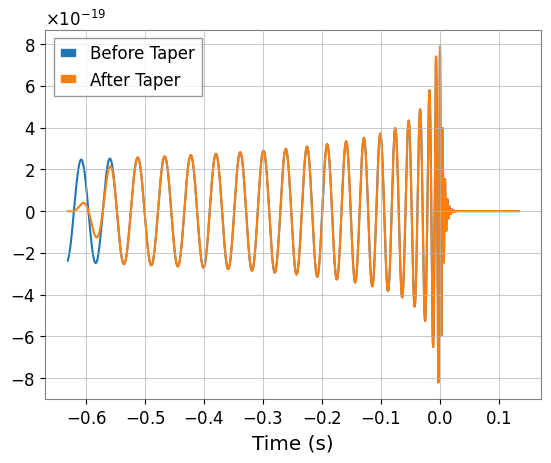

In [10]:
m1 = 38.9 # Solar masses
m2 = 31.6 # Solar masses

h_plus, _ = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m1,
                     mass2=m2,
                     delta_t=strain_H1.dt.value,
                     f_lower=20)

plt.plot(h_plus.sample_times, h_plus,label='Before Taper')
plt.plot(h_plus.sample_times, h_plus*get_window(('tukey',1/4),h_plus.shape[0]),label='After Taper')
plt.xlabel('Time (s)')
plt.legend()

In [13]:
strain_white = strain_H1.whiten(fftlength=4,overlap=2,window=('tukey',1./4.))

In [14]:
 #Badpassing the whitened strain with specific values are defined in the detection paper
strain_bp=strain_white.bandpass(35.,350.)

Text(0.5, 0, 'time [s]')

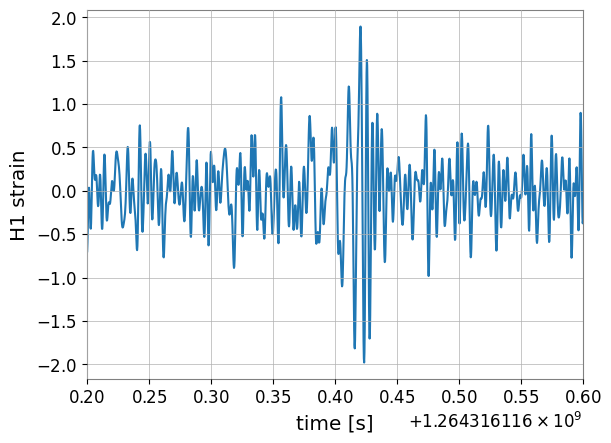

In [18]:
plt.plot(strain_bp)
plt.xlim(time_centre-0.2,time_centre+0.2)
plt.ylabel('H1 strain')
plt.xlabel('time [s]')

In [19]:
# Making it 32 seconds:
h_plus.prepend_zeros(np.ceil((16+h_plus.start_time)/h_plus.delta_t))
h_plus.append_zeros(np.floor((16-h_plus.end_time)/h_plus.delta_t))

template=TimeSeries.from_pycbc(h_plus)
template.duration

<Quantity 32. s>

In [21]:
# Same with the data:
strain_H1_32=strain_H1.crop(time_centre - 16,time_centre + 16)

/usr/local/lib/python3.11/dist-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(


In [22]:
# FFT of the data, with the appropriate normalisation
data_f=strain_H1_32.average_fft(window=('tukey',1./4.))*(strain_H1_32.duration/2)

In [23]:
# FFT of the template, with the appropriate normalisation
template_f=template.average_fft(window=('tukey',1./4.))*(template.duration/2)

In [24]:
# We will need the PSD with the same frequency spacing as the data and template,
# so we interpolate it to match:
Pxx_H1_32=Pxx_H1.interpolate(data_f.df.value)

In [25]:
# With the right normalisation, this is equation 7.58 of the textbook:
optimal=data_f*template_f.conjugate()/Pxx_H1_32
opt_time=2*optimal.ifft()*(optimal.df*2)

In [26]:
# This is equation 7.49 of the textbook: the overlap of the template with itself
sigmasq = 4 * np.real((template_f * template_f.conjugate() / Pxx_H1_32).sum() * template_f.df)
sigma = np.sqrt(np.abs(sigmasq))

# And now we have the SNR time series:
SNR_complex = opt_time/sigma

In [27]:
# We can recenter thing with the location of peak in the template:
peaksample = template.argmax()
SNR_complex = np.roll(SNR_complex,peaksample)
SNR = abs(SNR_complex)

In [28]:
SNRmax=SNR.max().value
time_max=SNR.times[SNR.argmax()]
print('Maximum SNR of {} at {}.'.format(SNRmax,time_max))

Maximum SNR of 15.407075492388932 at 1264316116.4233396 s.


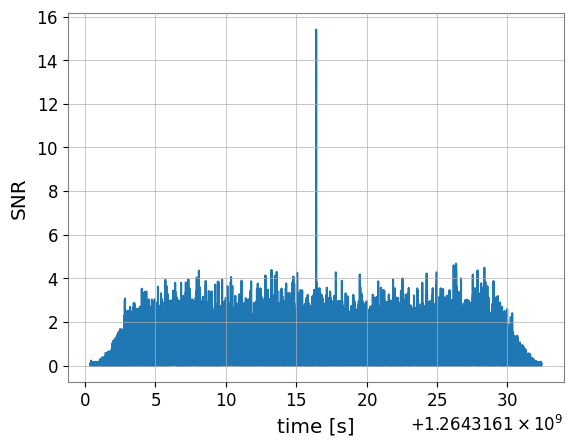

In [29]:
plt.plot(SNR.times,SNR)
plt.xlabel('time [s]')
plt.ylabel('SNR');

In [137]:
duration = strain_H1_32.duration.value  # Should be 32 seconds
print(duration)

32.0


In [138]:
dt = strain_H1_32.dt.value  # Sample spacing

In [139]:
print(dt)

0.000244140625


In [140]:
t = np.arange(-duration / 2, duration / 2, dt)

In [141]:
print(f"t min: {t.min()}, t max: {t.max()}, dt: {dt}, length: {len(t)}") #shows the bounds we need for the match filtering at 2048Hz


t min: -16.0, t max: 15.999755859375, dt: 0.000244140625, length: 131072


In [142]:
f_nyquist = 1 / (2 * dt)
print(f"Nyquist Frequency: {f_nyquist} Hz")

Nyquist Frequency: 2048.0 Hz


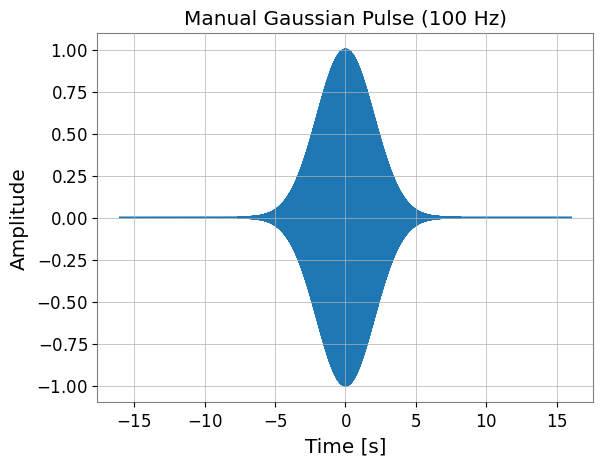

Max pulse value: 0.9999287234784653, Min: -0.9999287234784653


In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time array (16 seconds centered at 0)
t = np.arange(-16, 16, 0.000244140625)

# Frequency and standard deviation for the Gaussian
fc = 95  # 100 Hz center frequency
sigma = 2  # Adjust the Gaussian width

# Generate the Gaussian-modulated sine wave
gaussian_pulse_manual = np.exp(-t**2 / (2 * sigma**2)) * np.sin(2 * np.pi * fc * t)

# Plot the result
plt.plot(t, gaussian_pulse_manual)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Manual Gaussian Pulse (100 Hz)")
plt.show()

# Check if the pulse has non-zero values
print(f"Max pulse value: {np.max(gaussian_pulse_manual)}, Min: {np.min(gaussian_pulse_manual)}")


In [168]:
from gwpy.timeseries import TimeSeries

# Convert to TimeSeries (use the same sample rate as strain_H1)
gaussian_pulse_series = TimeSeries(gaussian_pulse_manual, dt=strain_H1.dt.value)
gaussian_pulse_series *= 7.6e-19  # Scale up to match GW strain levels


#gaussian_pulse_series = np.nan_to_num(gaussian_pulse_series, nan=0.0)


#gaussian_pulse_series = np.max(np.abs(gaussian_pulse_series))  # Normalize
#gaussian_pulse_series *= 1e21  # Scale up to match GW strain levels


In [169]:
gaussian_white = gaussian_pulse_series.whiten(fftlength=2, overlap=1, window=('tukey', 1./4.))

In [170]:
gaussian_f = gaussian_white.average_fft(window=('tukey', 1./4.)) * (gaussian_white.duration / 2)


In [171]:
# Ensure PSD matches the frequency resolution
Pxx_H1_interp = Pxx_H1.interpolate(gaussian_f.df.value)

# Compute the matched filter SNR
optimal_gaussian = strain_H1_32.average_fft(window=('tukey', 1./4.)) * gaussian_f.conjugate() / Pxx_H1_interp
opt_time_gaussian = 2 * optimal_gaussian.ifft() * (optimal_gaussian.df * 2)

# Compute sigma^2 (Equation 7.49)
sigma_sq_gaussian = 4 * np.real((gaussian_f * gaussian_f.conjugate() / Pxx_H1_interp).sum() * gaussian_f.df)
sigma_gaussian = np.sqrt(np.abs(sigma_sq_gaussian))

# Final SNR time series
SNR_gaussian = opt_time_gaussian / sigma_gaussian


Maximum SNR for Gaussian Pulse: 0.23100770760775194 at 1264316109.9855955 s s.


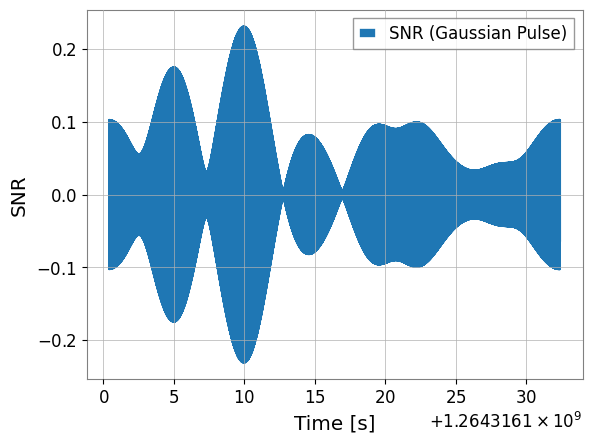

In [172]:
SNRmax_gaussian = SNR_gaussian.max().value
time_max_gaussian = SNR_gaussian.times[SNR_gaussian.argmax()]

print(f"Maximum SNR for Gaussian Pulse: {SNRmax_gaussian} at {time_max_gaussian} s.")

plt.plot(SNR_gaussian.times, SNR_gaussian, label="SNR (Gaussian Pulse)")
plt.xlabel("Time [s]")
plt.ylabel("SNR")
plt.legend()
plt.show()


In [ ]:
You're absolutely correct! A SNR of 15 for a Compact Binary Coalescence (CBC) signal is indeed a strong detection, and it's a sign that matched filtering for CBCs is a much more sensitive and robust method compared to using a single Gaussian pulse.
Why Matched Filtering for CBC is Superior:
1. Template-Based Methodology

    In CBC detection, you use precomputed templates (representing different binary configurations like mass, spin, etc.) of the gravitational wave signals that are expected from binary black hole mergers, neutron star mergers, etc.

    This method benefits from prior knowledge about the waveform shape (e.g., based on General Relativity predictions). By correlating the observed strain data with a large set of these templates, you increase the chances of detecting the signal, even when the noise is significant.

2. Signal Consistency

    Unlike a single Gaussian pulse, which is a broad and simplistic assumption about the waveform, CBCs have distinct and predictable waveforms (chirps, with well-defined frequency evolution over time).

    The matched filtering method aligns with these real waveforms more effectively, maximizing the signal's detectability by leveraging its known structure.

3. The Gaussian Pulse Limitation

    While a Gaussian pulse can model certain kinds of transient signals (like short-duration signals), it doesn't capture the full complexity of gravitational waves from compact binaries.

    The waveform of a CBC signal is more complex than a simple Gaussian, typically characterized by a chirp signal (gradually increasing frequency and amplitude). Using just a Gaussian pulse for detection would result in a poor match and lower SNR.

4. Noise Characteristics

    Matched filtering is very powerful because it also accounts for the noise properties by whitening the data, adapting the filter to the specific noise conditions of the detector.

    Using a Gaussian pulse or a single pulse shape doesn't adapt to these variations in noise as effectively as matched filtering does, especially when dealing with complex noise structures like those seen in gravitational wave detectors.